#Repaso clase 1
Vamos a realizar algunas ejecuciones para repasar toda la capa de dataframes, locs, ilocs, etc.

In [ ]:
import pandas as pd

In [ ]:
#1. Vamos a crear un dataframe para recordar cómo se crean (tabla como si fueran filas y columnas)
#.  El dataframe va a estar formado por tres columnas llamadas:
# - Nombres_Nuevos - Valores: Guille, Carlos, Jose
# - Edad - Valores: 50, 31, 18
# - Master - Valores: MDS, MDBS, EMBA
clase_dos = pd.DataFrame({"Nombres_Nuevos": ["Guille", "Carlos", "Jose"], "Edad":[50,31,18],"Master":["MDS","MBDS","EMBA"]})
clase_dos

In [ ]:
#2. Vamos ahora a ver solo una columna, en este caso la de Edad
clase_dos['Edad']

In [ ]:
#3. Ahora vamos a ver el nombre de nuestras columnas
clase_dos.columns

In [ ]:
#4. Tambien vamos a ver el índice de nuestro DF.
clase_dos.index

In [ ]:
#5.1. Ahora vamos a intentar encontrar la fila 2 con iloc, para encontrar por posición
clase_dos.iloc[2]

In [ ]:
#6.1. Vamos a recordar como cambiar el índice de una de nuestras columnas, vamos a poner Nombres_Nuevos como indice
clase_dos=clase_dos.set_index('Nombres_Nuevos')
clase_dos

In [ ]:
#6.2. Ahora vamos a volver a buscar en dicha tabla con loc utilizando el nombre de Jose.
clase_dos.loc["Jose"]

In [ ]:
clase_dos = pd.DataFrame({"Nombres_Nuevos": ["Guille", "Carlos", "Jose"], "Edad":[50,31,18],"Master":["MDS","MBDS","EMBA"]})
#7. Otra manera de encontrar valores, podemos buscar solo el master EMBA para ver que ocurre
clase_dos["Master"]=="EMBA"
#.  Esto nos devolvía valores true/false en función de lo que encuentra

In [ ]:
#8. Ahora vamos a buscar en ciertas columnas lo que hemos hecho antes, primero vamos a sacar la columna de Nombres_nuevos
clase_dos['Nombres_Nuevos']

In [ ]:
#9. Una vez tenemos dicha columna, queremos saber cual es el nombre cuyo master es el EMBA
#.  Para eso, simplemente tenemos que buscar por dicha condición
clase_dos[clase_dos["Master"]=="EMBA"]['Nombres_Nuevos']

In [ ]:
#10. Tambien podemos mezclar varias condiciones
#.   Por ejemplo, vamos a mezclar que el valor del master sea EMBA o MBDS
clase_dos[(clase_dos["Master"]=="EMBA") | (clase_dos["Master"]=="MBDS")]

In [ ]:
#11. Vamos a recordar ahora como asignar un valor a una celda
#.   Para ello vamos a usar iloc para cambiar un valor específico
#.   En este caso vamos a cambiar el valor de Jose por Maria
clase_dos.iloc[2,0]="Maria"
clase_dos

In [ ]:
#12. Ahora vamos a cambiar el valor de la Edad de María a 45 con loc
clase_dos.loc[2,"Edad"]=45
clase_dos

In [ ]:
#14. Tambien podemos incluir condicionales a la hora de asignar valores.
#.   Para ello incluimos el condicional en la forma en que busquemos (iloc, loc, values, etc)
clase_dos.loc[clase_dos['Edad']>35,"Master"]="MMMA"
clase_dos

# Renombrar, combinar y juntar DataFrames

En esta sección aprenderemos a alterar los nombres de las columnas de nuestro dataset y a combinar datasets, juntar dos DataFrames en uno, de forma parecida a como lo hacíamos con SQL.

## Renombrar columnas
Para renombrar columnas utilizaremos la función `rename()` de los DataFrame.

Por ejemplo, si queremos renombrar la columna *Order_Date* podemos hacerlo de la siguiente forma.

In [ ]:
# Primero vamos a importar un dataset
import pandas as pd

orders = pd.read_csv("https://raw.githubusercontent.com/cpinuaga/carlospinuagathevalley-IntroPandas2023/main/orders.csv")
orders

In [ ]:
orders = orders.rename(columns={"Order_Date": "Date"})
orders.head()

Como vemos hemos asignado el valor que devuelve la función `rename()` de nuevo al DataFrame orders. Recordemos que habitualmente las funciones de Pandas no modifican directamente el DataFrame original, simplemente devuelven la versión modificada del mismo.
También podemos utilizar el parámetro `inplace=True` de modo que el resultado se aplique sobre el DataFrame directamente.

In [ ]:
orders.rename(columns={"Date": "Order_Date"}, inplace=True)
orders.head()

El atributo `.columns` de un DataFrame nos devuelve el nombre de las columnas que tiene. También podemos cambiar el nombre de las columnas de un DataFrame modificando este atributo:

In [ ]:
orders.columns

In [ ]:
# Cambiemos el nombre de todas las columnas por su traducción al castellano
translated_columns = ['ID Cliente', 'ID Orden', 'Fecha Orden', 'Fecha envío', 'Modo de envío','ID Producto', 'Cantidad']
orders.columns = translated_columns
orders

## Ejes de los DataFrames
En Pandas muchas de las operaciones se pueden realizar a través de los dos ejes (axis) de un DataFrame. Ya sea a través de las filas (row wise) o a través de las columnas (column wise).
Los ejes pueden referenciarse como eje 0 (filas) y eje 1 (columnas):

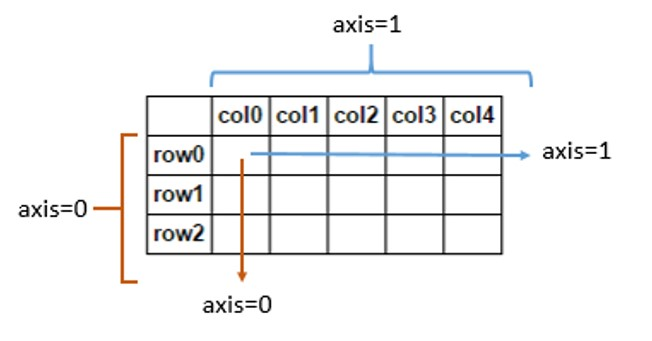

Recuerda que no significa que se realice la operación sobre las filas o columnas si no a través de ellas. Veamos un ejemplo aplicando la función [`mean()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html) para calcular la media sobre un DataFrame:

In [ ]:
# Podemos aplicar una función analítica sobre todo un DataFrame, lo que hará que se calcule sobre todas sus filas o columnas.
names = ['Marta', 'Jose', 'Elena']
dict_data = {
    "Edad":[50,31,18],
    "Altura": [170, 185, 165]
    }
test = pd.DataFrame(dict_data, index=names)
test

In [ ]:
# Probemos a calcular la media a través de las filas
# test.mean(axis=0)
test.mean(axis='rows')

In [ ]:
# El eje 0 también se puede indicar como 'index'
test.mean(axis='index')

In [ ]:
# Ahora a través de las columnas
test.mean(axis=1)
#test.mean(axis='columns')

Como vemos, el resultado varía y la media se calcula diferente para cada eje posible.
También es posible dar un nombre a los ejes, no es crítico pero si estamos haciendo un notebook de python muy didáctico o divulgativo puede ser útil.

In [ ]:
test = test.rename_axis("Nombres", axis='rows')
test = test.rename_axis("Características", axis='columns')
test

## Concatenar DataFrames

En ocasiones tenemos diferentes archivos o DataFrames que contienen información con los mismos campos o columnas. Imaginemos que tenemos archivos de años diferentes y queremos agruparlos en uno para trabajar con todos los años en el mismo DataFrame.

Utilizaremos la funcion [`concat()`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html)

In [ ]:
orders_2016 = pd.read_csv("https://raw.githubusercontent.com/cpinuaga/carlospinuagathevalley-IntroPandas2023/main/orders_2016.csv")
orders_2017 = pd.read_csv("https://raw.githubusercontent.com/cpinuaga/carlospinuagathevalley-IntroPandas2023/main/orders_2017.csv")

print(len(orders_2016))
print(len(orders_2017))

orders = pd.concat([orders_2016, orders_2017]) # La funcion concat recibe un array de DataFrames. Pueden ser más de 2!
orders

Al concatenar, por defecto se mantienen los índices originales de los DataFrames, en el caso anterior al ser autogenerados veremos que se nos han duplicado todos:

In [ ]:
# Si buscamos el índice 15 nos aparecen 2 resultados
orders.loc[15]

Para evitar esto, se pueden ignorar los índices y dejar que Pandas autogenere uno nuevo utilizando el parámetro `ignore_index=True`:

In [ ]:
orders = pd.concat([orders_2016, orders_2017], ignore_index=True)
orders

## Juntar Dataframes

Recordemos los tipos de JOIN que existen:

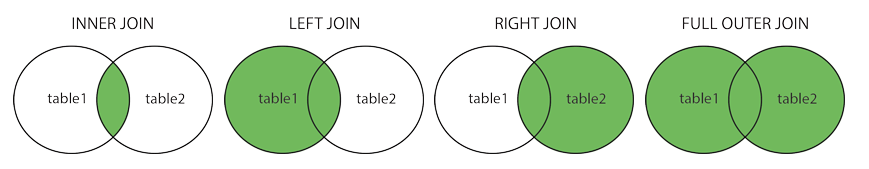

Igual que en SQL, con pandas podemos juntar tablas diferentes que tienen un campo común de manera muy fácil con la funcion  [merge()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) y  [join()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html)




Veamos primero la función `merge()`. La forma más sencilla de utilizarla es indicando los DataFrames a juntar y utilizar los parámetros:
- **how**: indicaremos el tipo de join que queremos hacer
 - 'inner': equivalente al inner join
 - 'left': equivalente al left join
 - 'right': equivalente al right join
 - 'outer': equivalente al full outer join

- **on**: indicaremos qué columna utilizar para realizar el join.

In [ ]:
orders = pd.read_csv("https://raw.githubusercontent.com/cpinuaga/carlospinuagathevalley-IntroPandas2023/main/orders_product_names.csv")
products = pd.read_csv("https://raw.githubusercontent.com/cpinuaga/carlospinuagathevalley-IntroPandas2023/main/products.csv")

# Realizaremos un left join de las tablas con la función merge.
orders_and_products = pd.merge(orders, products, how="left", on="Product_ID")
orders_and_products.head()

Al encontrar una columna (**Product_Name** en este caso) con el mismo nombre en los dos dataframes, Pandas nos añade los sufijo **_x _y** para diferenciarlos, pero podemos cambiar estos sufijos. *Se ha leído un csv de orders diferente que incluye el nombre de los productos para ilustrarlo*

In [ ]:
orders_and_products = pd.merge(orders, products, how="left", on="Product_ID", suffixes=("_left", "_right"))
orders_and_products.head()


También es posible utilizar la función `merge()` sobre el propio DataFrame que queremos cruzar en el lado izquierdo:

In [ ]:
orders_and_products = orders.merge(products, how="left", on="Product_ID")
orders_and_products.head()

Cuando la columna por la que queremos unir los dos dataframes no tiene el mismo nombre podemos especificar el nombre que tiene tanto en el dataframe de la izquierda como en el de la derecha, con left_on y right_on.



In [ ]:
#cargamos de nuevo las tablas limpias
orders = pd.read_csv("https://raw.githubusercontent.com/cpinuaga/carlospinuagathevalley-IntroPandas2023/main/orders_product_names.csv")
products = pd.read_csv("https://raw.githubusercontent.com/cpinuaga/carlospinuagathevalley-IntroPandas2023/main/products.csv")

#renombramos la columna de Product_ID
orders = orders.rename(columns={"Product_ID": "ID_Product"})

orders_and_products = orders.merge(products, how="left", left_on="ID_Product", right_on="Product_ID", suffixes=("_orders", "_products"))
orders_and_products.head(10)

La función join funciona de forma muy parecida pero utiliza los índices, requiere que al menos el
dataframe de la derecha tenga index asignado.

In [ ]:
orders = pd.read_csv("https://raw.githubusercontent.com/cpinuaga/carlospinuagathevalley-IntroPandas2023/main/orders.csv")
products = pd.read_csv("https://raw.githubusercontent.com/cpinuaga/carlospinuagathevalley-IntroPandas2023/main/products.csv")

products = products.set_index("Product_ID")

orders.join(products, on="Product_ID")

Si ambos DataFrames tienen el índice asignado, no es necesario incluir la columna por la que cruzar:

In [ ]:
orders = orders.set_index("Product_ID")

orders.join(products)

Para comprender mejor la diferencia entre left join e inner join vamos a ver un ejemplo:

In [ ]:
#EJEMPLO left join vs inner join
df1 = pd.DataFrame({"Nombres_Nuevos": ["Guille", "Carlos", 'Pablo', "Jose"], "Edad":[50,31, 46,18],"Master":["MDS","MBDS", 'MBA',"EMBA"]})
df2 = pd.DataFrame({"Nombres_Nuevos": ["Guille", "Carlos", 'Pablo', "Marta"], "Apellido_1":['García','Pinuaga','Gonzalez', 'Roble'],"Apellido_2":["Pérez","García", 'Vega',"Flores"]})

In [ ]:
df1

In [ ]:
df2

In [ ]:
pd.merge(df1, df2, how='left', on='Nombres_Nuevos')

In [ ]:
pd.merge(df1, df2, how='inner', on='Nombres_Nuevos')

# Ejercicio 1

Dirígete al notebook de ejercicios y realiza el ejercicio 1

# Ordenar

Podemos ordenar un Dataframe en función de sus valores.
Para ello utilizaremos la función [`sort_values()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html).

Podemos indicar con un array las columnas por las que queremos ordenar en orden de prioridad. También podemos incluir si queremos ordenar de manera ascendente o descendente con el parámetro `ascending`, si no lo incluimos se ordena en orden ascendente por defecto.



In [ ]:
orders = pd.read_csv("https://raw.githubusercontent.com/cpinuaga/carlospinuagathevalley-IntroPandas2023/main/orders.csv")
orders.sort_values(["Order_Date", "Quantity"], ascending=[False, True])

# Modificaciones avanzadas: Map() y Apply()

Hasta ahora hemos visto modificaciones relativamente sencillas de nuestro DataFrame. En ocasiones, necesitamos aportar una lógica un tanto más compleja o realizar alguna condición antes de asignar un nuevo valor o calcular el valor de una nueva columna.

Para ello necesitaremos definir funciones o hacer uso de las [funciones lambda](https://www.programiz.com/python-programming/anonymous-function) de python.

Map() y Apply() son las funciones más utilizadas para hacer este tipo de operaciones. Map funciona sobre columnas mientras que Apply puede funcionar sobre columnas o sobre todo el DataFrame.

## Definir funciones
Una función es un trozo de código que dado uno o n parámetros o argumentos, realiza una acción para devolver un valor.

Utilizamos funciones continuamente, como read_csv() para leer un archivo.

También podemos declarar nuestras propias funciones en python.


In [ ]:
def mi_funcion(x, y):
  valor = (x*x) / (y*2)
  return valor

mi_funcion(21, 86)

## Map()
Utilizaremos la función map cuando queremos aplicar una funcion sobre cada elemento una columna (Series).  

La función [map()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html) toma como argumento otra función, que contiene el código que queremos aplicar a cada elemento de la lista o columna.

In [ ]:
df = pd.DataFrame({ 'A': ['January','February','March','April'],
                   'B': [10,20,30,40],
                   'C': [20,40,60,80]
                  },
                  index=['Row 1', 'Row 2', 'Row 3', 'Row 4'])
df

In [ ]:
# Podemos definir funciones propias o utilizar funciones que ya existan en Python, por ejemplo str.upper(), que transforma a mayúsculas una cadena de texto.
str.upper('Lorem ipsum')

In [ ]:
# Utilizaremos la función str.upper() para pasar la columna A a mayúsculas
df['A'].map(str.upper)

Ahora vamos a crear una función para extraer el código de categoría de los datos de products. Tenemos que tener en cuenta que nuestra función recibirá un elemento de la columna (Series) como parámetro de entrada.

In [ ]:
products = pd.read_csv("https://raw.githubusercontent.com/cpinuaga/carlospinuagathevalley-IntroPandas2023/main/products.csv")

def extrae_codigo_categoria(product_id):
  # Seleccionamos los 3 primeros caracteres de product_id, que son el código de su categoría
  return product_id[0:3]

# Ahora creamos una nueva columna con ese código de categoría
products["Codigo_Categoría"] = products["Product_ID"].map(extrae_codigo_categoria)
products

## Apply()
La función `apply()` funciona de forma muy parecida a la funcion `map()`.
En este caso recibe una función que aplicará sobre un eje, filas o columnas enteras, o a todo el DataFrame.

In [ ]:
df = pd.DataFrame({ 'A': [1,2,3,4],
                   'B': [10,20,30,40],
                   'C': [20,40,60,80]
                  },
                  index=['Row 1', 'Row 2', 'Row 3', 'Row 4'])
df

Podemos aplicar la función sum a todas las columnas o filas del dataframe. Por defecto, lo aplica sobre todas las columnas del dataframe y nos devuelve la suma para cada una de ellas.

In [ ]:
df.apply(sum)

Pero con el parameto axis=1 podemos cambiarlo para que lo aplique sobre cada fila en lugar de sobre cada columna.

In [ ]:
df.apply(sum, axis=1)

In [ ]:
# En este caso podríamos conseguir los mismos efectos aplicando la función sum directamente. Lo interesante viene a la hora de aplicar nuestras propias funciones.
df.sum()

Como en el ejemplo de map, también podemos hacer una función nosotros mismos que realize otro cálculo utilizando una columna del DataFrame. En este caso, nuestra función recibe una fila o columna entera como parámetro:


In [ ]:
def mi_funcion(x):
    return (x*x / 60)

df.apply(mi_funcion)

In [ ]:
# Lo anterior es equivalente a hacer lo siguiente sobre cada columna.
df['A'] * df['A'] / 60

Como hemos visto en los ejemplos, el resultado de apply puede ser diferente si la función que pasamos actúa sobre elementos individuales o sobre una lista de valores, como la función `sum()`.

Podemos referenciar a los elementos de una fila o columna dentro de nuestra función.

In [ ]:
df

In [ ]:
def mi_funcion(x):
  return (x["B"] - x["A"])

df.apply(mi_funcion, axis=1)

Ahora vamos a definir nuestra propia funcion para pasar a mayúsculas Category y Sub_Category.

In [ ]:
def upper_codigos(x):
  return x.str.upper()

products[['Category', 'Sub_Category']].apply(upper_codigos)

In [ ]:
# Como map, se puede utilizar sobre una columna (Serie)
def extrae_codigo_subcat(x):
  return x[4:6]

products["Codigo_Subcategoría"] = products["Product_ID"].apply(extrae_codigo_subcat)

products.head()

# Funciones lambda

Las funciones lambda o funciones anónimas son funciones, usualmente pequeñas, que se declaran en la misma linea en la que se utilizan. Generalmente se hace para pasarselas a otras funciones sin tener que declararlas en otro lugar.

Pueden tener todos los argumentos que queramos, pero solo una línea de longitud.

Generalmente tienen un argumento o parámetro.

Se pueden utilizar en cualquier funcion que requiera una función, por ejemplo map() o apply().


In [ ]:
products = orders = pd.read_csv("https://raw.githubusercontent.com/cpinuaga/carlospinuagathevalley-IntroPandas2023/main/products.csv")

products["Codigo_Categoría"] = products["Product_ID"].map(lambda x: x[0:3])

products.head()

Vamos a aplicar una función lambda a cada fila del dataframe y asignarle un valor a una nueva columna en funcion de otras dos.

Cuando hacemos esto, lambda toma como entrada cada fila completa, con todas sus columnas.

In [ ]:
# Vamos a aplicar un descuento a los productos de la categoría 'Bookcases' que cuesten más de 600
products["Descuento"] = products.apply(lambda x: 0.12 if x["Sub_Category"]=="Bookcases" and x["Price"]>600 else 0, axis='columns')

products.head()

In [ ]:
# El código anterior es equivalente al siguiente sin utilizar funciones lambda
def indica_descuento(x):
  if x["Sub_Category"]=="Bookcases" and x["Price"]>600:
    return 0.12
  else:
    return 0

products["Descuento"] = products.apply(indica_descuento, axis='columns')
products.head()

#GroupBy y Agregaciones

Igual que en SQL, podemos agrupar el dataframe con la funcion [`groupby()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html), de tal forma que las funciones posteriores se apliquen a cada grupo por separado.
Para ello nos valdremos de operaciones encadenadas como veremos en los ejemplos.

Por ejemplo, si queremos contar valores de una columna en concreto.


En pandas hay que eliminar la agrupación al finalizar, si no el dataframe se mantiene agrupado. Para ello llamamos a la funcion `reset_index()`.


In [ ]:
#vamos a empezar con la tabla de products limpia de nuevo
products = pd.read_csv("https://raw.githubusercontent.com/cpinuaga/carlospinuagathevalley-IntroPandas2023/main/products.csv")

# Calculamos el número de productos con ID diferentes por cada categoría con la función nunique()
products.groupby(by="Category")["Product_ID"].nunique()

O calcular la media de precio agrupando por Cateoria y SubCategoria

In [ ]:
products.groupby(by=["Category", "Sub_Category"])["Price"].mean()

Con la función **agg** podemos hacer multiples agregaciones sobre una misma columna a un dataset agrupado, o incluso variar la agregación seleccionada en función de la columna.

Una lista de funciones es la siguiente

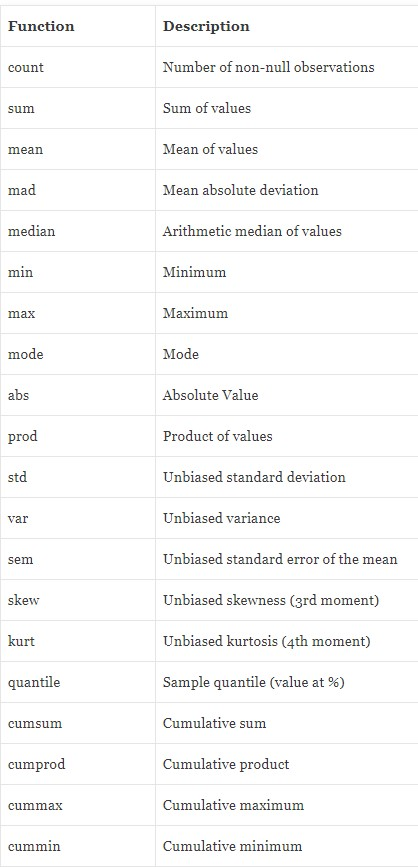



Por ejemplo, para agrupar por categoría y subcategoría y calcular el máximo de cada columna

In [ ]:
products.groupby(["Category", "Sub_Category"]).agg(["max"])

Observar como ha agrupado el índice de Categoría y Subcategoría. A esto se le llama indice jerárquico. Resulta más cómodo de leer, queda más bonito, y mejora el performance cuando estamos tratando con muchos (MUCHOS) datos.

Pero en ocasiones, si queremos utilizar este resultado en siguientes pasos, nos dificulta el trabajo. Para evitar este funcionamiento tenemos dos opciones. Utilizar la funcion `reset_index()` después de calcular, o utilizar el argumento `as_index=False` en `groupby()`.

In [ ]:
products.groupby(["Category", "Sub_Category"] ).agg("max").reset_index()

In [ ]:
products.groupby(["Category", "Sub_Category"], as_index=False).agg("max")

Pero lo normal es que queramos, por ejemplo, calcular la media de una columna, y el conteo de valores diferentes de otra.
Para ello tenemos forma de indicar qué columnas queremos agregar y qué hacer con cada una de ellas.

In [ ]:
products.groupby(["Category", "Sub_Category"]).agg({"Price": "mean", "Product_ID": "nunique"})

In [ ]:
#También podemos realizar varias operaciones de agregación sobre una columna de la siguiente manera:
products.groupby(["Category", "Sub_Category"]).agg({"Price": ["max","min","mean"], "Product_ID": "nunique"})

#Ejercicio 2

Ve al notebook de ejercicios y realiza el ejercicio 2

# Enlaces de interés
Comparación de Pandas con SQL: https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html

Pandas Cheat Sheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

Documentación oficial de Pandas:https://pandas.pydata.org/docs/index.html

# Déjanos tu feedback!
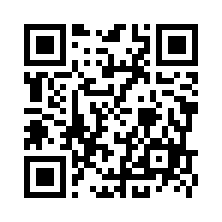

# Contacto
Podéís contactar conmigo si tenéis dudas.

Email: car.pinuaga@gmail.com

LinkedIn: https://www.linkedin.com/in/carlospinuaga